<a href="https://colab.research.google.com/github/Arashi283/AIRepoOne/blob/main/DDoS_Attack_Detector.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

--- First 5 rows of the dataset ---
   duration  src_bytes  dst_bytes  packet_count protocol   label
0       1.2       1024       4096            50      TCP  Normal
1       0.8        512       2048            30      UDP  Normal
2       2.5       2048       8192           100      TCP  Normal
3       0.1         64        128             5     ICMP  Normal
4       5.0       4096      16384           200      TCP  Normal

--- Dataset Info ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37 entries, 0 to 36
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   duration      37 non-null     float64
 1   src_bytes     37 non-null     int64  
 2   dst_bytes     37 non-null     int64  
 3   packet_count  37 non-null     int64  
 4   protocol      37 non-null     object 
 5   label         37 non-null     object 
dtypes: float64(1), int64(3), object(2)
memory usage: 1.9+ KB

Label mapping: {0: 'DDoS', 1: 'Normal'}

--

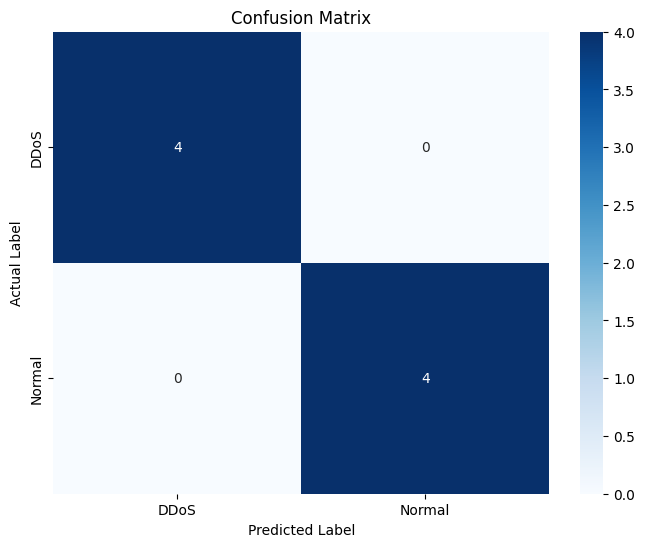


--- Feature Importance ---
                importance
packet_count  3.274933e-01
src_bytes     3.122507e-01
dst_bytes     2.907770e-01
duration      6.947896e-02
protocol      1.145644e-16


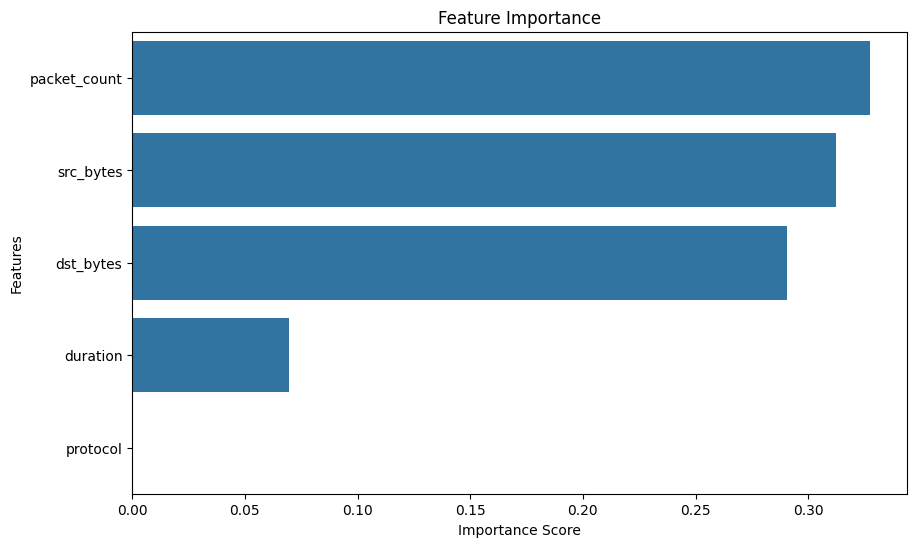

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# --- 1. Load the Dataset ---
# Load the dataset from the CSV file.
# This dataset contains synthetic data representing network traffic.
try:
    df = pd.read_csv('/content/sample_data/ddos_dataset.csv')
except FileNotFoundError:
    print("Error: 'ddos_dataset.csv' not found. Make sure the dataset file is in the correct directory.")
    exit()

print("--- First 5 rows of the dataset ---")
print(df.head())
print("\n--- Dataset Info ---")
df.info()

# --- 2. Preprocessing the Data ---

# Handle categorical features. In this dataset, 'protocol' and 'label' are categorical.
# We will use LabelEncoder to convert them into numerical format.
label_encoder_protocol = LabelEncoder()
label_encoder_label = LabelEncoder()

df['protocol'] = label_encoder_protocol.fit_transform(df['protocol'])
df['label'] = label_encoder_label.fit_transform(df['label'])

# Separate features (X) and the target variable (y)
X = df.drop('label', axis=1)
y = df['label']

# Get the mapping of original labels to encoded labels
label_mapping = {index: label for index, label in enumerate(label_encoder_label.classes_)}
print(f"\nLabel mapping: {label_mapping}")


# Split the data into training and testing sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Feature Scaling
# Standardize features by removing the mean and scaling to unit variance.
# This is important for many machine learning algorithms.
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


# --- 3. Train the Machine Learning Model ---

# We will use a RandomForestClassifier, which is an ensemble model
# known for its high accuracy and robustness.
print("\n--- Training the RandomForest Classifier ---")
model = RandomForestClassifier(n_estimators=100, random_state=42, class_weight='balanced')

# Train the model on the training data
model.fit(X_train, y_train)
print("Model training complete.")


# --- 4. Evaluate the Model ---

# Make predictions on the test set
y_pred = model.predict(X_test)

# Calculate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print(f"\nModel Accuracy: {accuracy:.4f}")

# Display a detailed classification report
print("\n--- Classification Report ---")
# Use the inverse_transform to show original labels in the report
target_names = label_encoder_label.inverse_transform(sorted(y.unique()))
print(classification_report(y_test, y_pred, target_names=target_names))

# Display the confusion matrix
print("\n--- Confusion Matrix ---")
cm = confusion_matrix(y_test, y_pred)
print(cm)

# Visualize the confusion matrix using a heatmap for better interpretation
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=target_names, yticklabels=target_names)
plt.title('Confusion Matrix')
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')
plt.show()

# --- 5. Feature Importance ---
# Analyze which features were most important for the model's decisions.
print("\n--- Feature Importance ---")
feature_importances = pd.DataFrame(model.feature_importances_,
                                   index = X.columns,
                                   columns=['importance']).sort_values('importance', ascending=False)
print(feature_importances)

# Visualize feature importances
plt.figure(figsize=(10, 6))
sns.barplot(x=feature_importances.importance, y=feature_importances.index)
plt.title('Feature Importance')
plt.xlabel('Importance Score')
plt.ylabel('Features')
plt.show()

--- Searching for .parquet files... ---
Found 17 files. Loading and combining...
Dataset successfully loaded and sampled to 43137 rows.

--- Preprocessing Data ---

Label mapping: {0: 'Benign', 1: 'DrDoS_DNS', 2: 'DrDoS_LDAP', 3: 'DrDoS_MSSQL', 4: 'DrDoS_NTP', 5: 'DrDoS_NetBIOS', 6: 'DrDoS_SNMP', 7: 'DrDoS_UDP', 8: 'LDAP', 9: 'MSSQL', 10: 'NetBIOS', 11: 'Portmap', 12: 'Syn', 13: 'TFTP', 14: 'UDP', 15: 'UDP-lag', 16: 'UDPLag', 17: 'WebDDoS'}

--- Starting Hyperparameter Tuning for RandomForest ---
Fitting 3 folds for each of 24 candidates, totalling 72 fits

--- Hyperparameter Tuning Complete ---
Best Parameters found: {'max_depth': None, 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 100}

Best Model Accuracy: 0.9308

--- Classification Report ---
               precision    recall  f1-score   support

       Benign       0.99      1.00      1.00      1983
    DrDoS_DNS       0.54      0.38      0.45        73
   DrDoS_LDAP       0.31      0.41      0.35        32
  DrD

/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


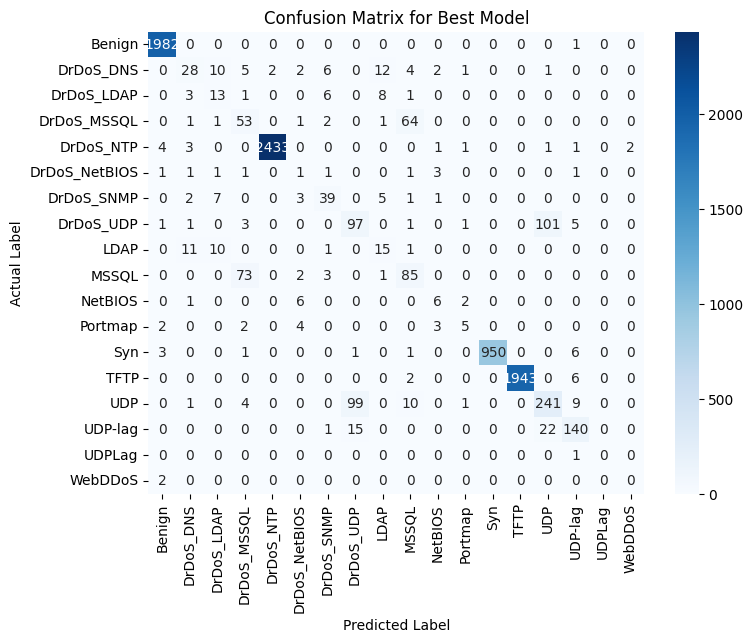


--- Top 20 Feature Importances ---
                          importance
Fwd_Packet_Length_Min       0.052842
Packet_Length_Min           0.050689
Avg_Packet_Size             0.050309
Fwd_Seg_Size_Min            0.050263
Flow_Bytes/s                0.049247
Fwd_Header_Length           0.044132
Fwd_Packets_Length_Total    0.043855
Packet_Length_Max           0.043835
Packet_Length_Mean          0.043701
Fwd_Packet_Length_Max       0.038386
Fwd_Packet_Length_Mean      0.038005
Avg_Fwd_Segment_Size        0.036920
Subflow_Fwd_Bytes           0.033225
Fwd_Packets/s               0.026514
Flow_IAT_Mean               0.026458
Fwd_IAT_Max                 0.024560
Flow_IAT_Max                0.022977
Fwd_IAT_Total               0.021856
Flow_Duration               0.021184
Flow_Packets/s              0.021140


AttributeError: 'Index' object has no attribute 'head'

<Figure size 1200x800 with 0 Axes>

In [5]:
import pandas as pd
import glob
import os
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# --- 1. Load and Combine the Dataset ---
# Search for all .parquet files in the current directory and combine them.
# This is designed to work with datasets like CIC-DDoS2019.
print("--- Searching for .parquet files... ---")
path = '.' # Current directory
all_files = glob.glob(os.path.join(path, "*.parquet"))

if not all_files:
    print("Error: No .parquet files found in the current directory.")
    print("Please place this script in the same folder as your CIC DDoS dataset files.")
    exit()

print(f"Found {len(all_files)} files. Loading and combining...")
df_list = [pd.read_parquet(file) for file in all_files]
df = pd.concat(df_list, ignore_index=True)
# Add this line to take a 10% sample
df = df.sample(frac=0.1, random_state=42)
print(f"Dataset successfully loaded and sampled to {len(df)} rows.")
# --- 2. Preprocessing the Data ---
print("\n--- Preprocessing Data ---")

# Clean column names: remove leading/trailing spaces, replace spaces with underscores
df.columns = df.columns.str.strip().str.replace(' ', '_').str.replace('.', '_')

# Rename the label column to be consistent
if 'Label' in df.columns:
    df.rename(columns={'Label': 'label'}, inplace=True)
else:
    print("Error: 'Label' column not found. Please check your dataset.")
    exit()

# Drop rows with missing values
df.dropna(inplace=True)

# Separate features (X) and the target variable (y)
X = df.drop('label', axis=1)
y = df['label']

# Identify and handle non-numeric columns
# We will encode the 'Protocol' column and drop other non-numeric ones.
non_numeric_columns = X.select_dtypes(include=['object', 'category']).columns

for col in non_numeric_columns:
    # Check if the column is 'Protocol' (or similar) to encode it
    if 'protocol' in col.lower():
        print(f"Encoding categorical feature: {col}")
        le = LabelEncoder()
        X[col] = le.fit_transform(X[col])
    else:
        # If it's another non-numeric column, drop it for this model
        print(f"Dropping non-numeric feature: {col}")
        X.drop(col, axis=1, inplace=True)

# Convert any infinite values to NaN and then drop them if they exist
X.replace([np.inf, -np.inf], np.nan, inplace=True)
X.dropna(inplace=True)
y = y[X.index] # Align labels with the cleaned features

# Encode the target variable ('Benign'/'DDoS')
label_encoder_label = LabelEncoder()
y_encoded = label_encoder_label.fit_transform(y)

# Get the mapping of original labels to encoded labels
label_mapping = {index: label for index, label in enumerate(label_encoder_label.classes_)}
print(f"\nLabel mapping: {label_mapping}")


# Split the data into training and testing sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42, stratify=y_encoded)

# Feature Scaling
# Standardize features by removing the mean and scaling to unit variance.
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


# --- 3. Hyperparameter Tuning with GridSearchCV ---

# We will use GridSearchCV to find the best parameters for our RandomForestClassifier.
# NOTE: This can be VERY slow on a large dataset. For a quicker run, reduce the param_grid options.
print("\n--- Starting Hyperparameter Tuning for RandomForest ---")

# Define the grid of parameters to search
param_grid = {
    'n_estimators': [50, 100],          # Reduced for speed
    'max_depth': [10, 20, None],
    'min_samples_split': [2, 5],        # Reduced for speed
    'min_samples_leaf': [1, 2]          # Reduced for speed
}

# Initialize the classifier
rf = RandomForestClassifier(random_state=42, class_weight='balanced')

# Initialize GridSearchCV
# cv=3 for faster cross-validation on a large dataset.
# n_jobs=-1 means it will use all available CPU cores.
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid,
                           cv=3, n_jobs=-1, verbose=2, scoring='accuracy')

# Fit GridSearchCV to the training data
grid_search.fit(X_train, y_train)

# Get the best model and its parameters
print("\n--- Hyperparameter Tuning Complete ---")
print("Best Parameters found:", grid_search.best_params_)
best_model = grid_search.best_estimator_


# --- 4. Evaluate the Best Model ---

# Make predictions on the test set using the best model found
y_pred = best_model.predict(X_test)

# Calculate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print(f"\nBest Model Accuracy: {accuracy:.4f}")

# Display a detailed classification report
print("\n--- Classification Report ---")
target_names = label_encoder_label.classes_
print(classification_report(y_test, y_pred, target_names=target_names))

# Display the confusion matrix
print("\n--- Confusion Matrix ---")
cm = confusion_matrix(y_test, y_pred)
print(cm)

# Visualize the confusion matrix using a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=target_names, yticklabels=target_names)
plt.title('Confusion Matrix for Best Model')
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')
plt.show()

# --- 5. Feature Importance from the Best Model ---
print("\n--- Top 20 Feature Importances ---")
feature_importances = pd.DataFrame(best_model.feature_importances_,
                                   index = X.columns,
                                   columns=['importance']).sort_values('importance', ascending=False)
print(feature_importances.head(20))

# Visualize feature importances
plt.figure(figsize=(12, 8))
sns.barplot(x=feature_importances.importance.head(20), y=feature_importances.index.head(20))
plt.title('Top 20 Feature Importances')
plt.xlabel('Importance Score')
plt.ylabel('Features')
plt.tight_layout()
plt.show()



